# Neural Network in Torch

## Aproach 1
- Prediction: Manually
- Gradients Computation: Manually
- Loss Computation: Manually
- Parameter updates: Manually

In [3]:
import numpy as np
# initialize x, y and w
x=np.array([1,2,3,4],dtype=np.float32)
y=np.array([2,4,6,8],dtype=np.float32)
w=0.0
# model prediction via forward pass
def forward(x):
    return w*x
# loss calculation
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()
# gradient calculation
def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()
print(f'Prediction before training: f(5)={forward(5):.3f}')
# training
learning_rate=0.01
n_iters=10
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    dw=gradient(x,y,y_pred)
    w-=learning_rate*dw
    if epoch%1==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={forward(5):.3f}')


Prediction before training: f(5)=0.000
epoch 1: w=1.200, loss=30.00000000
epoch 2: w=1.680, loss=4.79999924
epoch 3: w=1.872, loss=0.76800019
epoch 4: w=1.949, loss=0.12288000
epoch 5: w=1.980, loss=0.01966083
epoch 6: w=1.992, loss=0.00314574
epoch 7: w=1.997, loss=0.00050331
epoch 8: w=1.999, loss=0.00008053
epoch 9: w=1.999, loss=0.00001288
epoch 10: w=2.000, loss=0.00000206
Prediction after training: f(5)=9.999


## Approach 2
- Prediction: Manually*
- Gradients Computation: Autograd
- Loss Computation: Manually
- Parameter updates: Manually

In [8]:
import torch
# initialize x, y and w
x=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,6,8],dtype=torch.float32)
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
# model prediction via forward pass
def forward(x):
    return w*x
# loss calculation
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()
# gradient calculation
# gradient will be calculated automatically 
# using autograd when we call loss.backward()
# w has requires_grad=True --> autograd will track all operations on w
# --> calling loss.backward() will calculate the gradient of loss w.r.t w
# --> will be stored in w.grad
print(f'Prediction before training: f(5)={forward(5):.3f}')
# training
learning_rate=0.01
n_iters=100
# this process is slow for autograd because it is dynamic, meaning it keeps track of all operations on tensors
# so it is slower than numpy
# so more epochs are needed
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    l.backward()# calculate gradient of loss w.r.t w
    # grad is stored in w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad 
        w.grad.zero_()
    if epoch%10==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={forward(5):.3f}')


Prediction before training: f(5)=0.000
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Prediction after training: f(5)=10.000


## Appraoch 3
- Prediction: Manually
- Gradients Computation: Autograd
- Loss Computation: PyTorch Loss
- Parameter updates: PyTorch Optimizer

In [12]:
import torch
# initialize x, y and w
x=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,6,8],dtype=torch.float32)
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
# model prediction via forward pass
def forward(x):
    return w*x
# loss calculation
loss=torch.nn.MSELoss()
#parameter upfates/optmization
optimizer=torch.optim.SGD([w],lr=0.01)
print(f'Prediction before training: f(5)={forward(5):.3f}')
# training
n_iters=100
for epoch in range(n_iters):
    y_pred=forward(x)
    l=loss(y,y_pred)
    l.backward()# calculate gradient of loss w.r.t w
                # grad is stored in w.grad
    # update weights                        #Previously:
    optimizer.step()                        # with torch.no_grad():
    # empty gradients                       #     w -= learning_rate * w.grad 
    optimizer.zero_grad()                     #     w.grad.zero_()                                  
    if epoch%10==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={forward(5):.3f}')

Prediction before training: f(5)=0.000
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Prediction after training: f(5)=10.000


## Approach 4
- Prediction: PyTorch Model
- Gradients Computation: Autograd
- Loss Computation: PyTorch Loss
- Parameter updates: PyTorch Optimizer

In [ ]:
import torch
import torch.nn as nn
# initialize x, y and w
x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)
# model must have no. of feature and instances defined
n_samples,n_features=x.shape
input_size=n_features
output_size=n_features
# model prediction via forward pass
model = nn.Linear(input_size,output_size)
# loss calculation
loss=torch.nn.MSELoss()
#parameter upfates/optmization
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)


#x test is defined as tensor so that it can work with model
x_test=torch.tensor([5],dtype=torch.float32)
# for better visualization, express predict as a scalar
print(f'Prediction before training: f(5)={model(x_test).item():.3f}')
# training
n_iters=100
for epoch in range(n_iters):
    y_pred=model(x) # use model to predict
    l=loss(y,y_pred)
    l.backward()# calculate gradient of loss w.r.t w
                # grad is stored in w.grad
    # update weights                        #Previously:
    optimizer.step()                        # with torch.no_grad():
    # empty gradients                       #     w -= learning_rate * w.grad 
    optimizer.zero_grad()                     #     w.grad.zero_()                                  
    if epoch%10==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print(f'Prediction after training: f(5)={model(x_test).item():.3f}')

# didn't need to create the model for ourself
# optimization is faster


Prediction before training: f(5)=-1.875
epoch 1: w=2.000, loss=38.68419266
epoch 11: w=2.000, loss=1.34160626
epoch 21: w=2.000, loss=0.35563082
epoch 31: w=2.000, loss=0.31144208
epoch 41: w=2.000, loss=0.29270688
epoch 51: w=2.000, loss=0.27565396
epoch 61: w=2.000, loss=0.25960913
epoch 71: w=2.000, loss=0.24449866
epoch 81: w=2.000, loss=0.23026747
epoch 91: w=2.000, loss=0.21686473
Prediction after training: f(5)=9.225


## Present case 4 as a model

epoch 1: loss=1.35214615
epoch 101: loss=0.00411033
epoch 201: loss=0.00116677
epoch 301: loss=0.00054280
epoch 401: loss=0.00025171
epoch 501: loss=0.00009829
epoch 601: loss=0.00003351
epoch 701: loss=0.00001148
epoch 801: loss=0.00000436
epoch 901: loss=0.00000194
Loss: 4.934422577207442e-07


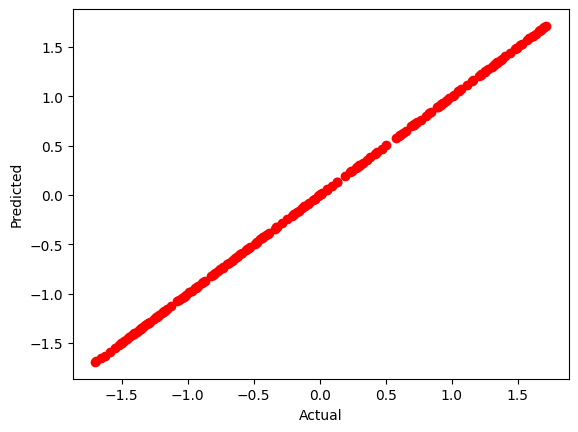

     Actual  Predicted
0  0.629027   0.628552
1  1.697768   1.698637
2 -1.191954  -1.193016
3  0.930119   0.929838
4 -0.212108  -0.212971
5 -0.472947  -0.472700
6  0.652682   0.652794
7  0.192482   0.192207
8  0.417365   0.417306
9 -1.385783  -1.386947


In [21]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# load the data
X_list=[i for i in range(1000)]
X=np.array(X_list,dtype=np.float32).reshape(-1,1)
Y=7*X+3*np.random.rand(1000,1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

# Scale the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train = sc.fit_transform(y_train)  # Optional scaling for Y
y_test = sc.transform(y_test)

# Convert to tensors
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# dfine model class;
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()  # super().__init__() would've done just fine
        self.neuralnet=nn.Sequential(
            nn.Linear(input_dim,10),
            nn.ReLU(),
            nn.Linear(10,output_dim)
        )
            
    def forward(self,x):
        return self.neuralnet(x)
# define model object  
model=LinearRegression(x_train.shape[1],1)
#loss and optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

N_epochs=1000
for epoch in range(N_epochs):
    y_pred=model(x_train)
    loss=criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%100==0:
        print(f'epoch {epoch+1}: loss={loss.item():.8f}')
# evaluation
with torch.no_grad():
    y_pred=model(x_test)
    loss=criterion(y_pred,y_test)
    print(f'Loss: {loss.item()}')
    plt.plot(y_test,y_pred,'ro')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
result=pd.DataFrame({'Actual':y_test.numpy().flatten(),'Predicted':y_pred.numpy().flatten()})
print(result.head(10))
